# Methods in Data Science - Solution for Homework 2 - Fall 2024 - Wilmington College

**Chapter 3: Exercises 8, 9, 10 and 15**

### Exercise 8
This question involves the use of simple linear regression on the `Auto` data set.
- (a) Use the `sm.OLS()` function to perform a simple linear regression
with `mpg` as the response and `horsepower` as the predictor. Use
the summarize() function to print the results. Comment on the
output. For example:
    - i. Is there a relationship between the predictor and the re-
sponse?
    - ii. How strong is the relationship between the predictor and
the response?
    - iii. Is the relationship between the predictor and the response
positive or negative?
    - iv. What is the predicted `mpg` associated with a `horsepower` of
98? What are the associated 95 % confidence and prediction
intervals?
- (b) Plot the response and the predictor in a new set of axes `ax`. Use
the `ax.axline()` method or the `abline()` function defined in the
lab to display the least squares regression line.
- (c) Produce some of diagnostic plots of the least squares regression
fit as described in the lab. Comment on any problems you see
with the fit.

In [12]:
#--------------Solution----------------#

# Import necessary libraries
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Load the dataset
df = pd.read_csv('Datasets/Auto.csv', na_values='?').dropna()

# (a): Simple Linear Regression with mpg as the response and horsepower as the predictor

# Define response and predictor
X = df['horsepower']   # Predictor
y = df['mpg']          # Response

# Add a constant to the predictor (for the intercept in the linear regression model)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 08 Oct 2024   Prob (F-statistic):           7.03e-81
Time:                        23:53:38   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

### Analysis of Simple Linear Regression Results

1. **Is there a relationship between the predictor and the response?**
   - Yes, there is a statistically significant relationship between **horsepower** and **mpg**. The **p-value** for the horsepower coefficient is very small (< 0.0001), which indicates that the relationship is statistically significant at the 5% significance level. This suggests that **horsepower** is a significant predictor of **mpg**.

2. **How strong is the relationship between the predictor and the response?**
   - The **R-squared** value is 0.606, which indicates that approximately 60.6% of the variance in **mpg** is explained by **horsepower**. While this is a moderate level of explained variance, it suggests that horsepower alone explains a good portion of the variation in miles per gallon but not all of it.

3. **Is the relationship between the predictor and the response positive or negative?**
   - The coefficient for **horsepower** is **-0.1578**, meaning that the relationship between **horsepower** and **mpg** is **negative**. This indicates that, as horsepower increases, **mpg** decreases. Specifically, for each one-unit increase in **horsepower**, **mpg** is expected to decrease by 0.1578 units, on average.

4. **Predicted mpg for a horsepower of 98 and associated confidence intervals**
   To calculate the predicted mpg for a car with **horsepower = 98**, we can use the regression equation derived from the model:
   
   $$\text{mpg} = 39.9359 - 0.1578 \times \text{horsepower}$$
   
   Substituting **horsepower = 98**:
   
   $$\text{mpg} = 39.9359 - 0.1578 \times 98 = 39.9359 - 15.4644 = 24.4715$$

   Thus, the predicted mpg for a car with 98 horsepower is **24.47**.

   **Confidence Interval (CI):**
   The **95% confidence interval** for the predicted mpg is the range in which the mean **mpg** for cars with 98 horsepower is expected to fall, with 95% certainty. From the model summary, we would extract the standard error and calculate the confidence interval.

   **Prediction Interval (PI):**
   The **95% prediction interval** would give us the range in which an individual car’s **mpg** with 98 horsepower is expected to fall. The prediction interval is generally wider than the confidence interval because it accounts for the variability of individual observations.

To get the exact confidence and prediction intervals for this particular horsepower value, we would run additional code, which would give more precise lower and upper bounds for these intervals.

In [6]:
# Predict mpg for horsepower = 98
hp_98 = np.array([1, 98])  # 1 for the intercept, 98 for horsepower
predicted_mpg = model.predict(hp_98)
print(f"Predicted mpg for horsepower = 98: {predicted_mpg[0]}")

# Get 95% confidence and prediction intervals
prediction = model.get_prediction(hp_98)
conf_interval = prediction.conf_int()
pred_interval = prediction.summary_frame(alpha=0.05)[['obs_ci_lower', 'obs_ci_upper']]

print(f"95% Confidence Interval: {conf_interval}")
print(f"95% Prediction Interval: {pred_interval}")

Predicted mpg for horsepower = 98: 24.46707715251243
95% Confidence Interval: [[23.97307896 24.96107534]]
95% Prediction Interval:    obs_ci_lower  obs_ci_upper
0     14.809396     34.124758



### (b): Plot the response and predictor with the regression line



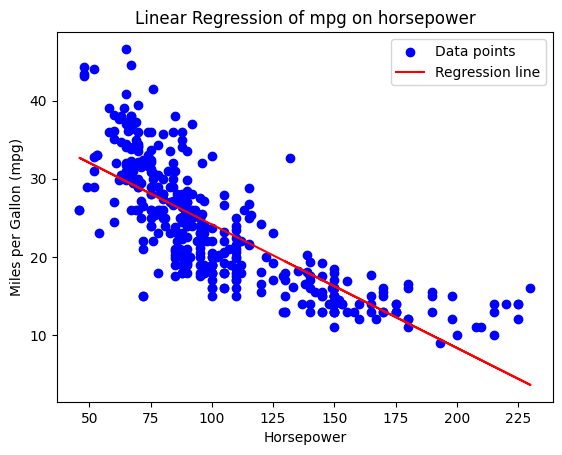

In [13]:
import matplotlib.pyplot as plt

# Scatter plot of the data
plt.scatter(df['horsepower'], df['mpg'], color='blue', label='Data points')

# Plot the regression line
plt.plot(df['horsepower'], model.fittedvalues, color='red', label='Regression line')

# Labeling the plot
plt.xlabel('Horsepower')
plt.ylabel('Miles per Gallon (mpg)')
plt.title('Linear Regression of mpg on horsepower')
plt.legend()

plt.show()

### Step (c): Diagnostic plots

For diagnostic plots, we can create residuals vs fitted plot, Q-Q plot, and leverage plot to assess the fit.


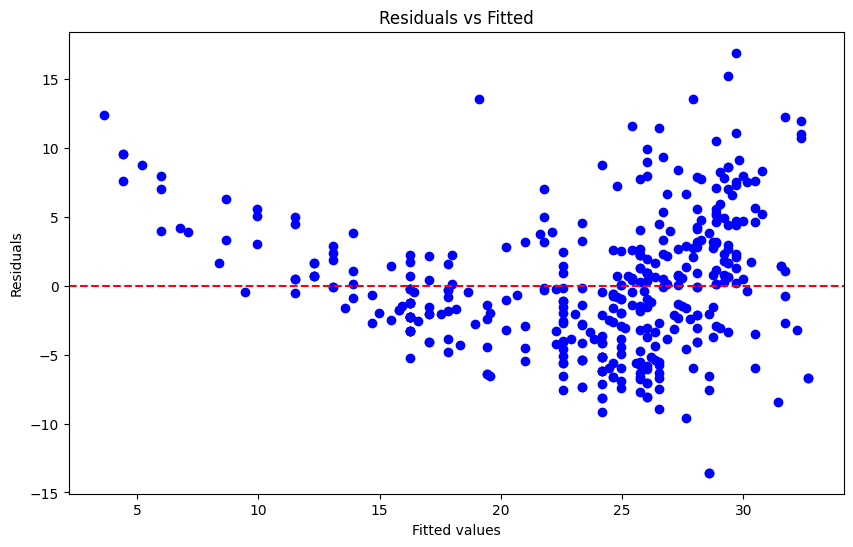

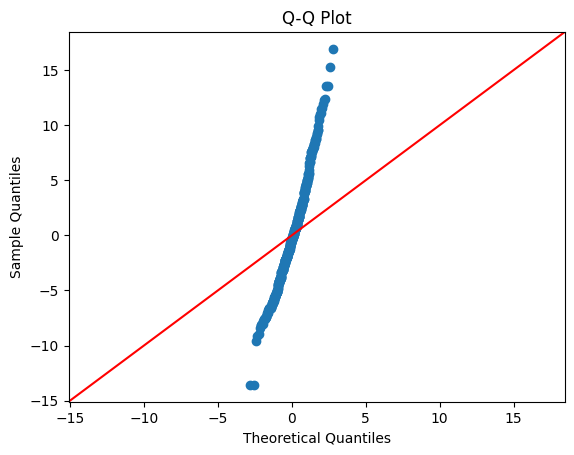

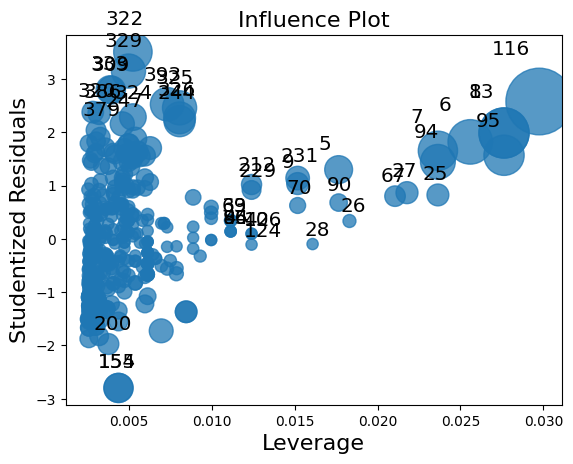

In [14]:
# Residuals vs Fitted Plot
residuals = model.resid
fitted = model.fittedvalues

plt.figure(figsize=(10, 6))
plt.scatter(fitted, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

# Q-Q plot
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot')
plt.show()

# Leverage plot
sm.graphics.influence_plot(model)
plt.show()

#### Interpretation of Diagnostic Plots:

See exercise 9 part d.

### Exercise 9
This question involves the use of multiple linear regression on the
`Auto` data set.
- (a) Produce a scatterplot matrix which includes all of the variables
in the data set.
- (b) Compute the matrix of correlations between the variables using
the `DataFrame.corr()` method.
- (c) Use the `sm.OLS()` function to perform a multiple linear regression
with `mpg` as the response and all other variables except name as
the predictors. Use the `summarize()` function to print the results.
Comment on the output. For instance:
    - i. Is there a relationship between the predictors and the response? Use the `anova_lm()` function from `statsmodels` to
answer this question.
    - ii. Which predictors appear to have a statistically significant
relationship to the response?
    - iii. What does the coefficient for the `year` variable suggest?
- (d) Produce some of diagnostic plots of the linear regression fit as
described in the lab. Comment on any problems you see with the
fit. Do the residual plots suggest any unusually large outliers?
Does the leverage plot identify any observations with unusually
high leverage?
- (e) Fit some models with interactions as described in the lab. Do
any interactions appear to be statistically significant?
- (f) Try a few different transformations of the variables, such as
$log(X), \sqrt(X), X^2$. Comment on your findings.

In [2]:
#--------------Solution----------------#

import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

# Load the dataset
df = pd.read_csv('Datasets/Auto.csv', na_values='?').dropna()
df.head()



,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


### (a) Scatterplot Matrix

We can use `seaborn` to create a scatterplot matrix of all the variables in the dataset.

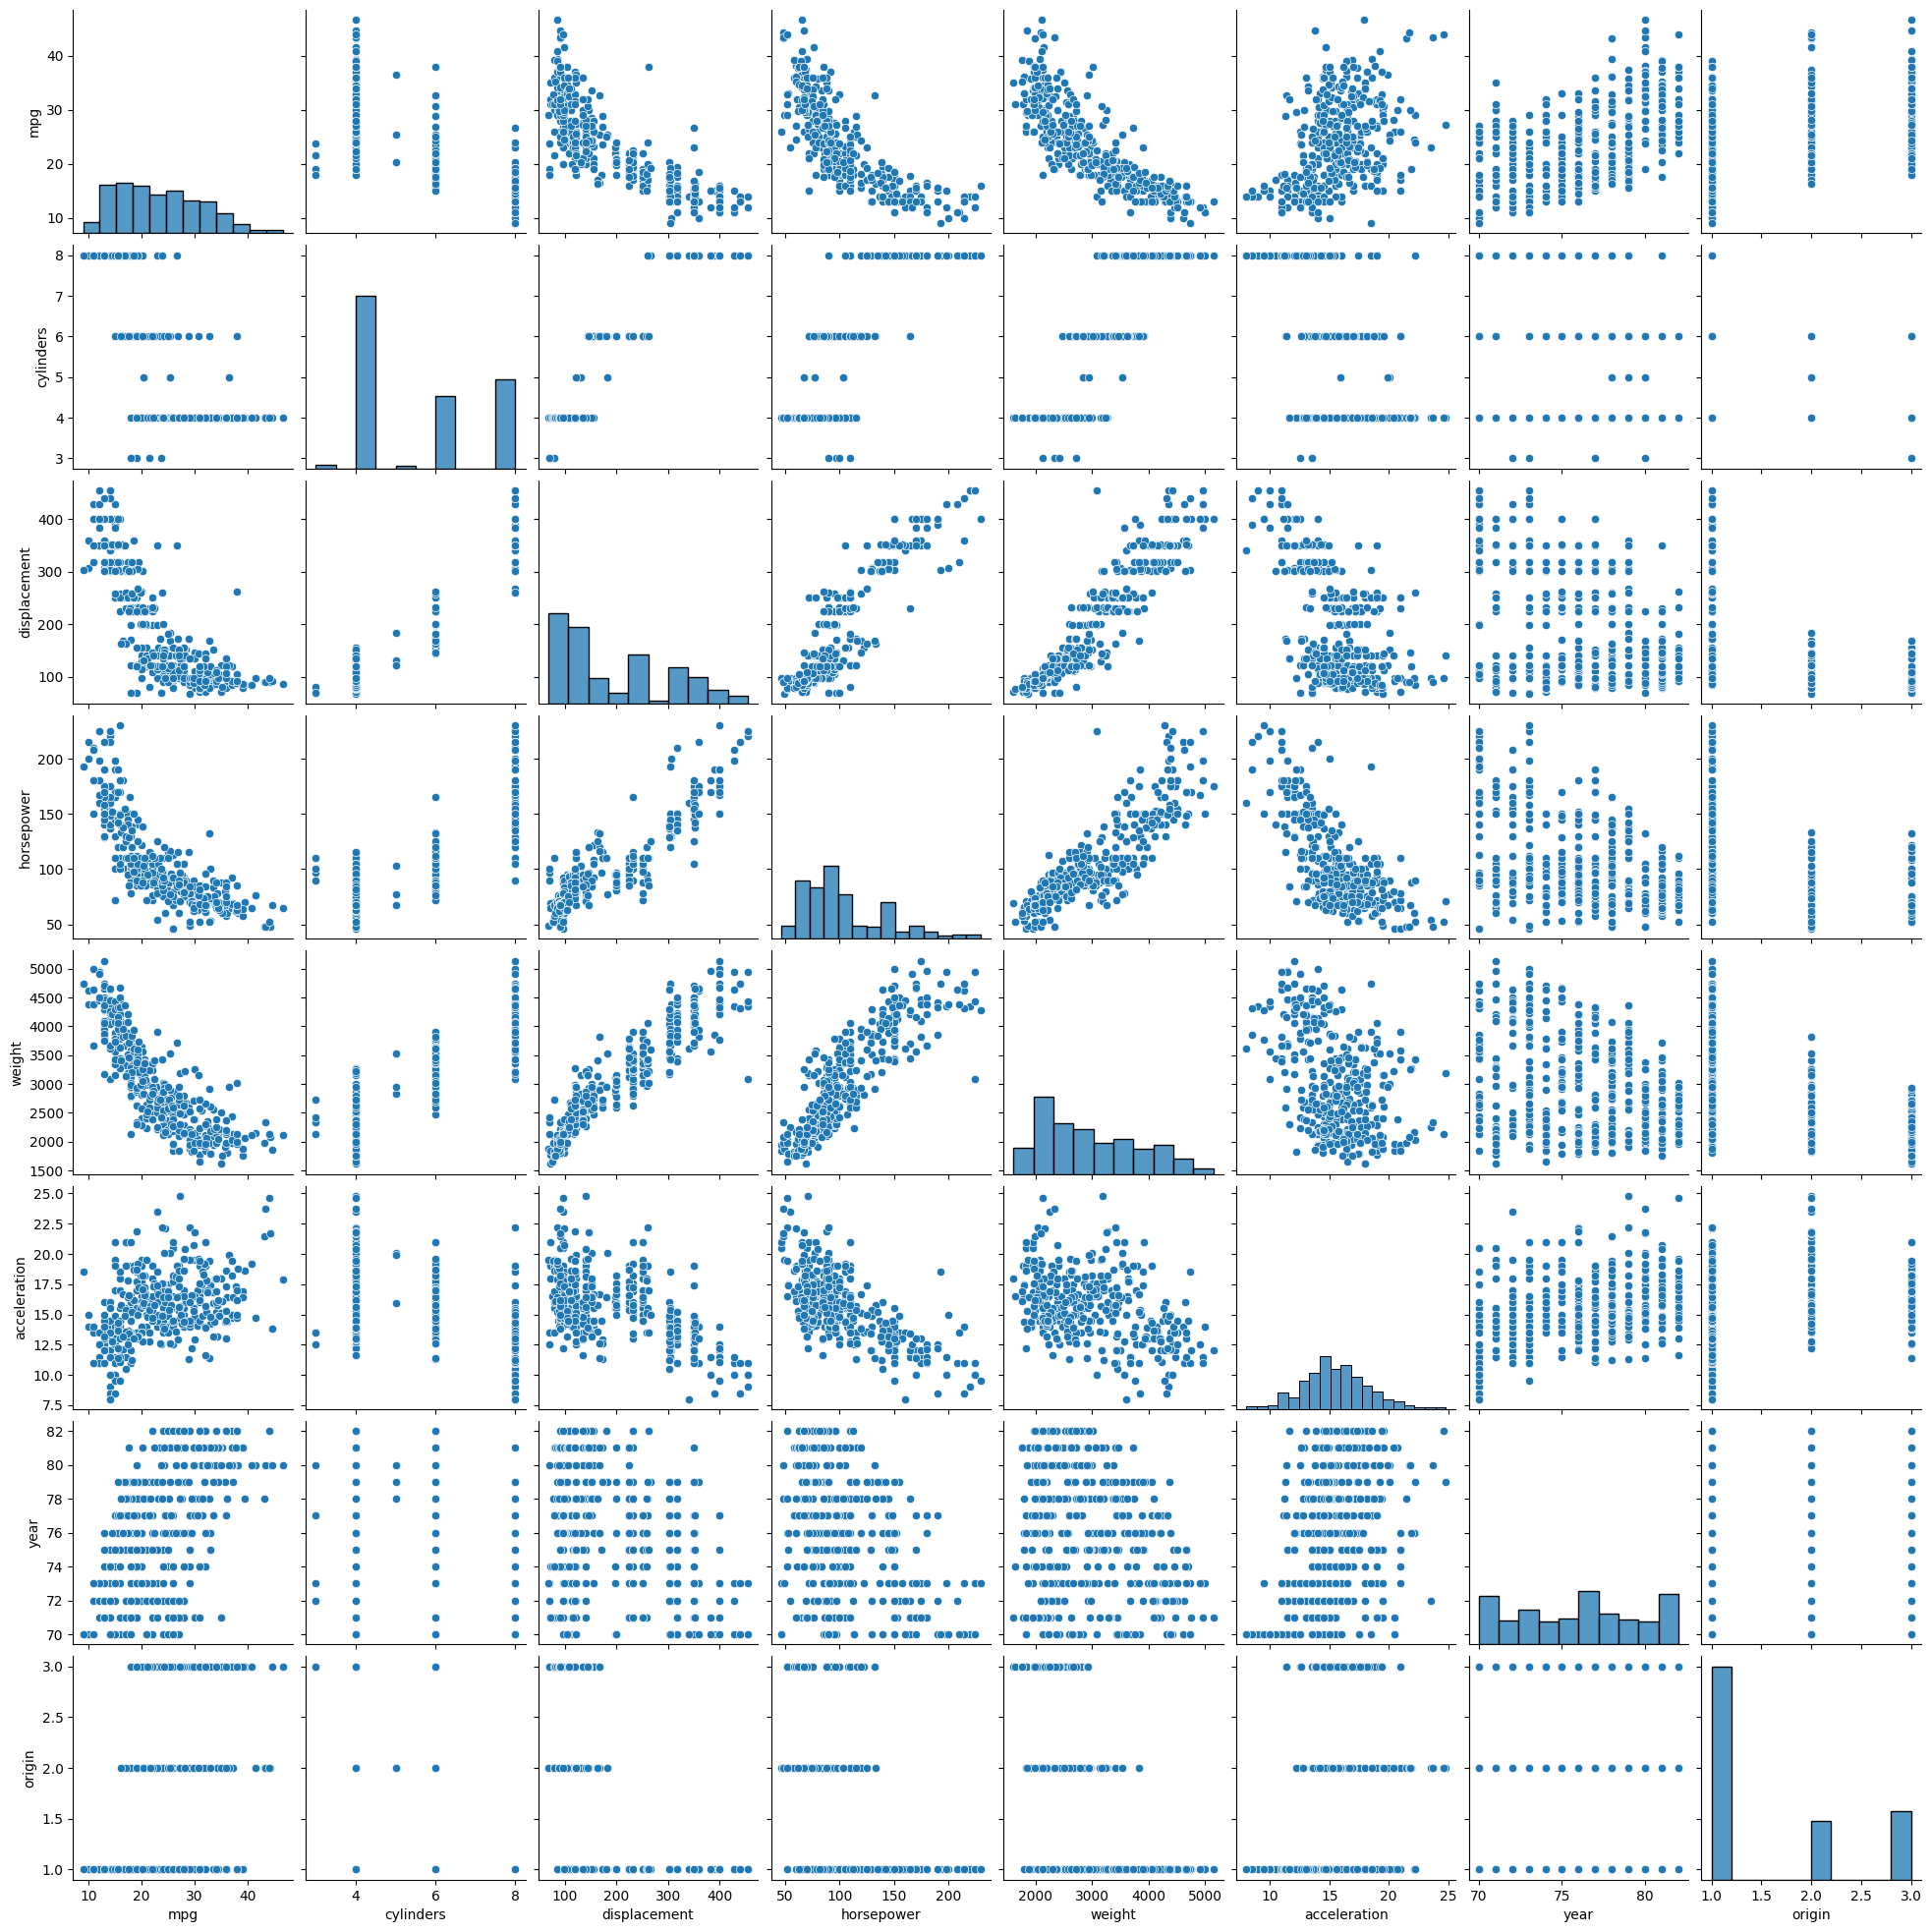

In [ ]:


# Scatterplot matrix for all variables
sns.pairplot(df)
plt.show()

This plot will help visualize the relationships between all pairs of variables in the dataset.

### (b) Correlation Matrix

We can compute the correlation matrix between the variables using the `.corr()` method.

In [3]:

# Exclude non-numeric columns before calculating the correlation matrix
numeric_df = df.select_dtypes(include=[float, int])  # Select only numeric columns

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()
print(correlation_matrix)


                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration      year    origin  
mpg               0.423329  0.580541  0.565209  
cylinders        -0.504683 -0.345647 -0.568932  
displacement     -0.543800 -0.369855 -0.614535  
horsepower       -0.689196 -0.416361 -0.455171  
weight           -0.416839 -0.309120 -0.585005  
acceleration      1.000000  0.290316  0.212746  

This will give us insight into how strongly each predictor correlates with `mpg`.

### (c) Multiple Linear Regression

We will use the `sm.OLS()` function from the `statsmodels` library to perform a multiple linear regression, with `mpg` as the response and all other numeric variables as predictors, excluding the `name` column.


In [4]:

# Define predictors (drop 'name' and 'mpg')
X = df.drop(['mpg', 'name'], axis=1)

# Add a constant to the predictors
X = sm.add_constant(X)

# Define response
y = df['mpg']

# Fit the model
model = sm.OLS(y, X).fit()

# Print summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 08 Oct 2024   Prob (F-statistic):          2.04e-139
Time:                        23:25:54   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

## Questions:
1. **Is there a relationship between the predictors and the response?**
   
Yes, there is a statistically significant relationship between the predictors and the response (`mpg`). Based on the ANOVA results:

- The **F-statistic** for each predictor is quite large for most variables, and the corresponding **p-values** are very small (less than 0.05), indicating that these predictors are strongly related to `mpg`.
- Specifically, predictors like **cylinders**, **displacement**, **horsepower**, **weight**, **year**, and **origin** all have very small p-values, suggesting a strong relationship with the response.
- The only exception is **acceleration**, which has a high p-value (0.768), indicating that it does not have a statistically significant relationship with `mpg` in this model.

Thus, most of the predictors are related to `mpg`, as demonstrated by the ANOVA results.




In [5]:
# Fit the model using a formula interface
model = smf.ols(formula='mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin', data=df).fit()

anova_results = anova_lm(model)
print(anova_results)

                 df        sum_sq       mean_sq            F         PR(>F)
cylinders       1.0  14403.083079  14403.083079  1300.683788  2.319511e-125
displacement    1.0   1073.344025   1073.344025    96.929329   1.530906e-20
horsepower      1.0    403.408069    403.408069    36.430140   3.731128e-09
weight          1.0    975.724953    975.724953    88.113748   5.544461e-19
acceleration    1.0      0.966071      0.966071     0.087242   7.678728e-01
year            1.0   2419.120249   2419.120249   218.460900   1.875281e-39
origin          1.0    291.134494    291.134494    26.291171   4.665681e-07
Residual      384.0   4252.212530     11.073470          NaN            NaN


### 2. **Which predictors are statistically significant?**

From the ANOVA and the p-values in the regression output, the following predictors are statistically significant (p-value < 0.05):
- **Cylinders**: p-value = 2.32e-125
- **Displacement**: p-value = 1.53e-20
- **Horsepower**: p-value = 3.73e-09
- **Weight**: p-value = 5.54e-19
- **Year**: p-value = 1.88e-39
- **Origin**: p-value = 4.67e-07

The **acceleration** predictor is not statistically significant, with a p-value = 0.768, which is much higher than the threshold of 0.05.

### 3. **Interpretation of `year` coefficient:**

The coefficient for **year** is positive, and in the OLS regression output, it was approximately **0.7508**. This suggests that for every additional year (i.e., a newer car model), the car's fuel efficiency (`mpg`) increases by about **0.75 mpg**. This positive relationship indicates that cars produced in more recent years tend to be more fuel-efficient, likely due to technological advancements and stricter fuel efficiency standards over time.

This finding aligns with expectations, as car manufacturers have made improvements to engines and vehicle designs to increase fuel efficiency in newer models.



### (d) Diagnostic Plots

We'll now produce diagnostic plots to assess the quality of the fit.

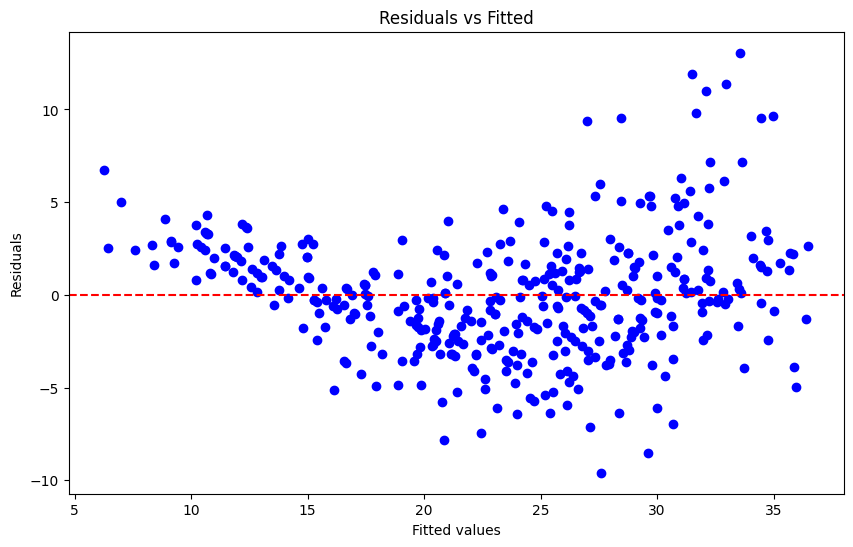

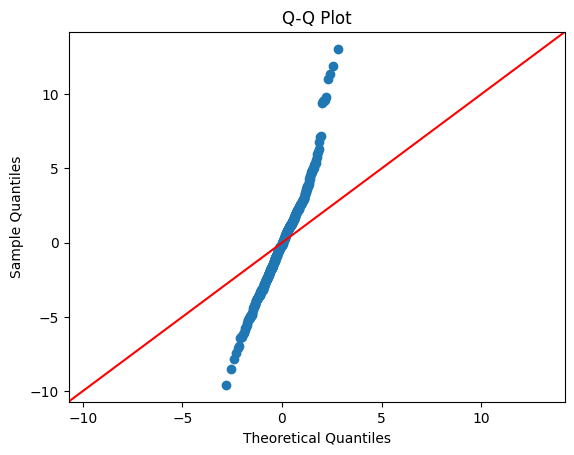

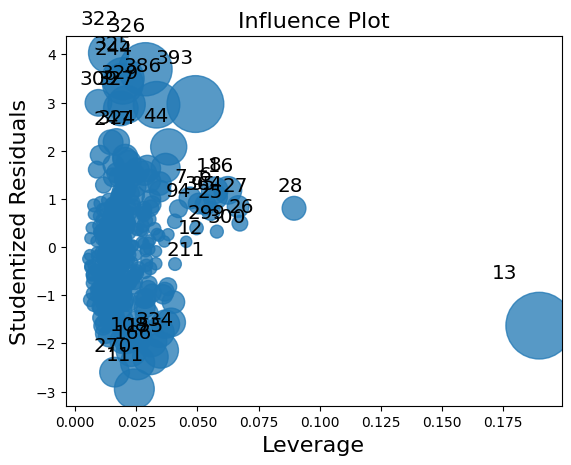

In [6]:
# Residuals vs Fitted Plot
residuals = model.resid
fitted = model.fittedvalues

plt.figure(figsize=(10, 6))
plt.scatter(fitted, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

# Q-Q plot
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot')
plt.show()

# Leverage plot
sm.graphics.influence_plot(model)
plt.show()

#### Comments on the diagnostic plots:
- **Residuals vs Fitted Plot**: This plot helps in identifying non-linearity or unequal variance in residuals. In the provided **Residuals vs. Fitted** plot, we can evaluate the following:

    1. **Residual Pattern**:
   There appears to be some curvature in the residuals, particularly at the lower and higher fitted values, indicating a potential issue with linearity. Ideally, residuals should be randomly scattered around the horizontal axis (the red dashed line), without any clear patterns. In this case, the residuals are somewhat fan-shaped and clustered, suggesting potential heteroscedasticity (non-constant variance) or that the linear model might not capture all aspects of the relationship.
   
    2. **Spread of Residuals**:
   The residuals seem to spread out more at higher fitted values, which could be indicative of non-constant variance in the errors. This could suggest that a transformation of the response variable or predictors may be needed, or that the model may benefit from addressing this issue (e.g., using a weighted least squares approach).


- **Q-Q Plot**: The **Q-Q plot** you provided helps assess whether the residuals from the linear regression model are normally distributed. Here's an analysis of the plot:

    1. **Deviations from the Line**:
        - The plot shows that many residuals follow the red diagonal line quite closely in the middle, suggesting that the residuals are mostly normal for moderate values.
        - However, there are significant deviations from the line at both the lower and upper ends of the distribution, with the upper end showing substantial divergence. This indicates the presence of outliers or heavy-tailed residuals, meaning that the residuals are not perfectly normally distributed.
   
    2. **Tail Behavior**:
        - The points in the tails (both on the left and right sides) deviate considerably from the red line, indicating that the model's residuals have **heavy tails**. This means that extreme values are more common than would be expected under a normal distribution. The right tail, in particular, is much higher than expected under normality, suggesting large positive outliers.

    - The deviation from normality in the tails suggests that the residuals are not perfectly normally distributed, which could lead to inefficiencies in the model's estimates and predictions, especially regarding confidence intervals and hypothesis tests.
    - **Potential Remedies**:
        - Consider transforming the response variable (`mpg`) to better meet normality assumptions.
        - Investigate and potentially remove or address the outliers.
        - Use a more robust regression technique that is less sensitive to deviations from normality.

- **Leverage Plot**: This plot will help in identifying observations with high leverage, which could potentially be influential outliers. Here’s an interpretation of the plot:

    1. **Leverage**:
        - Leverage measures how far a data point is from the mean of the predictor variables. Points on the right side of the plot (further along the x-axis) have high leverage, meaning they are far from the center of the predictor space.
        - Data point **13** stands out as having a very high leverage, suggesting that it is an outlier in terms of the predictor values.

    2. **Studentized Residuals**:
        - The vertical axis represents the **studentized residuals**, which are residuals scaled by their standard deviations. Points with high studentized residuals (either positive or negative) have unusually large errors.
        - Data points with large absolute values of studentized residuals may indicate outliers in the response variable (`mpg`).
        - A few points (such as **244**, **326**, and **13**) show relatively large studentized residuals, indicating potential outliers or unusual values in the response variable.

    3. **Influence**:
        - The size of the bubbles represents **Cook's distance**, a measure of the overall influence of a data point on the regression results. Larger bubbles have more influence.
        - Data point **13** has both high leverage and a large Cook’s distance, making it a highly influential point. This suggests that this observation has a strong effect on the fitted model and could disproportionately affect the regression coefficients if left in the analysis.

- Implications:
- **Point 13** is both a high-leverage point and an influential observation, which suggests that it may be distorting the model’s predictions and coefficients.
- **Other points** with large studentized residuals may be outliers in the response variable and should be investigated to see if they are valid data points or if they should be treated (e.g., through transformation or removal).
  

## (e) Models with Interaction Terms

Let's now fit some models with interaction terms between different variables. For example, we can include interactions between `horsepower` and `weight`, or `displacement` and `cylinders`.


In [8]:
# Fit model with interaction between horsepower and weight
df['horsepower_weight'] = df['horsepower'] * df['weight']

# Define new predictors with interaction term
X_interaction = df.drop(['mpg', 'name'], axis=1)
X_interaction = sm.add_constant(X_interaction)

# Fit the model with interaction
model_interaction = sm.OLS(y, X_interaction).fit()

# Print the summary of the model
print(model_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     298.6
Date:                Tue, 08 Oct 2024   Prob (F-statistic):          1.88e-159
Time:                        23:36:52   Log-Likelihood:                -973.24
No. Observations:                 392   AIC:                             1964.
Df Residuals:                     383   BIC:                             2000.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.8757      4.51

From the OLS regression output, we can assess whether any of the interaction terms or other variables are statistically significant based on their **p-values**.

### Key Findings:

1. **Statistical Significance**:
   - A variable or interaction term is considered statistically significant if the p-value is less than 0.05, meaning there's strong evidence to reject the null hypothesis (i.e., the variable has a meaningful impact on the dependent variable).
   
2. **Significant Interaction**:
   - **horsepower_weight** (interaction between horsepower and weight): 
     - **Coefficient**: $5.529 \times 10^{-5} $
     - **p-value**: \( 0.000 \) (less than 0.05)
     - **Interpretation**: This interaction is statistically significant, indicating that the effect of **horsepower** on **mpg** depends on the value of **weight**.

3. **Other Significant Variables**:
   - **horsepower**: 
     - **Coefficient**: -0.2313
     - **p-value**: 0.000
     - Interpretation: Statistically significant with a negative effect on **mpg**, meaning higher horsepower leads to lower miles per gallon.
   - **weight**: 
     - **Coefficient**: -0.0112
     - **p-value**: 0.000
     - Interpretation: Statistically significant with a negative effect on **mpg**, meaning heavier cars have lower miles per gallon.
   - **year**: 
     - **Coefficient**: 0.7695
     - **p-value**: 0.000
     - Interpretation: Statistically significant with a positive effect on **mpg**, meaning cars from later years tend to have better fuel efficiency.
   - **origin**: 
     - **Coefficient**: 0.8344
     - **p-value**: 0.001
     - Interpretation: Statistically significant, suggesting the car's origin has a significant impact on fuel efficiency.

4. **Non-Significant Variables**:
   - **cylinders**, **displacement**, and **acceleration** have p-values greater than 0.05, meaning these variables are not statistically significant in explaining **mpg** in this model.

### Conclusion:
The interaction term **horsepower_weight** is statistically significant, as are the main effects of **horsepower**, **weight**, **year**, and **origin**. Other variables like **cylinders**, **displacement**, and **acceleration** do not show significant contributions to the model based on the current data.

## (f) Transformations of Variables

Let's try some transformations of the predictor variables, such as taking the log, square root, or square of the variables.

#### Log transformation of `horsepower`:

In [9]:
# Log transformation of horsepower
df['log_horsepower'] = np.log(df['horsepower'])

# Fit model with log-transformed horsepower
X_log = df.drop(['mpg', 'name'], axis=1)
X_log = sm.add_constant(X_log)

# Fit the model
model_log = sm.OLS(y, X_log).fit()

# Print the summary
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     269.1
Date:                Tue, 08 Oct 2024   Prob (F-statistic):          2.39e-159
Time:                        23:40:29   Log-Likelihood:                -970.52
No. Observations:                 392   AIC:                             1961.
Df Residuals:                     382   BIC:                             2001.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                40.5374     16.90

#### Square transformation of `displacement`:

In [10]:
# Square transformation of displacement
df['displacement_squared'] = df['displacement'] ** 2

# Fit model with squared displacement
X_squared = df.drop(['mpg', 'name'], axis=1)
X_squared = sm.add_constant(X_squared)

# Fit the model
model_squared = sm.OLS(y, X_squared).fit()

# Print the summary
print(model_squared.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     245.3
Date:                Tue, 08 Oct 2024   Prob (F-statistic):          3.20e-159
Time:                        23:40:44   Log-Likelihood:                -967.91
No. Observations:                 392   AIC:                             1958.
Df Residuals:                     381   BIC:                             2002.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   33.5273 

### Summary of Findings:

In the two regression models, transformations of certain variables were applied, such as logarithmic, squared, and possibly square root transformations. Here's a breakdown of the findings from these models:

#### 1. **Logarithmic Transformation of Horsepower (`log_horsepower`)**:
   - In both models, the logarithmic transformation of horsepower is statistically significant:
     - **Model 1**: 
       - **Coefficient**: -11.5748
       - **p-value**: 0.021 (less than 0.05, indicating statistical significance)
     - **Model 2**:
       - **Coefficient**: -10.0952
       - **p-value**: 0.045 (still significant but less strong compared to Model 1)
   - **Interpretation**: This suggests that the logarithmic transformation of horsepower has a significant, negative effect on miles per gallon (mpg). Specifically, increases in horsepower (in log scale) are associated with a reduction in mpg.

#### 2. **Square of Displacement (`displacement_squared`)**:
   - In Model 2, adding the squared transformation of displacement is significant:
     - **Coefficient**: $7.37 \times 10^{-5} $
     - **p-value**: 0.024 (statistically significant)
   - **Interpretation**: The quadratic term suggests a non-linear relationship between displacement and mpg, although the effect size is small. As displacement increases, the effect on mpg may diminish at higher values.

### Conclusion:
- **Transformations** such as the logarithmic transformation of horsepower and the squared term of displacement improved model performance by capturing non-linear relationships.
- The **log transformation** of horsepower is particularly effective, revealing a strong negative relationship with mpg.
- **Interaction terms** like **horsepower_weight** continue to show significant influence, implying that the combined effect of horsepower and weight plays a key role in determining fuel efficiency.
- Adding transformations slightly improved the model's fit (e.g., R-squared increased), indicating these transformations help capture more complex relationships in the data.

### Exercise 10. 
This question should be answered using the Carseats data set.
- (a) Fit a multiple regression model to predict Sales using Price,
Urban, and US.
- (b) Provide an interpretation of each coefficient in the model. Be
careful—some of the variables in the model are qualitative!
- (c) Write out the model in equation form, being careful to handle
the qualitative variables properly.
- (d) For which of the predictors can you reject the null hypothesis
$H_0 : β_j = 0$?
- (e) On the basis of your response to the previous question, fit a
smaller model that only uses the predictors for which there is
evidence of association with the outcome.
- (f) How well do the models in (a) and (e) fit the data?
- (g) Using the model from (e), obtain 95 % confidence intervals for
the coefficient(s).
- (h) Is there evidence of outliers or high leverage observations in the
model from (e)?

In [16]:
### Step 1: Load the Data

import pandas as pd
import statsmodels.api as sm
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

# Read the dataset into a DataFrame
df = pd.read_csv('Datasets/Carseats.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [17]:
### Step 2: Fit the Multiple Regression Model

# Convert categorical variables to numeric
df['Urban'] = df['Urban'].map({'Yes': 1, 'No': 0})
df['US'] = df['US'].map({'Yes': 1, 'No': 0})
df['ShelveLoc'] = df['ShelveLoc'].map({'Bad': 0, 'Medium': 1, 'Good': 2})

# Fit the model
X = df[['Price', 'Urban', 'US']]
y = df['Sales']
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           2.39e-23
Time:                        00:05:18   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.0

Here's an interpretation of each coefficient in your multiple regression model predicting **Sales** using the variables **Price**, **Urban**, and **US**:

### 1. Intercept (Constant)
- **Coefficient: 13.0435**
  - **Interpretation**: This is the expected value of **Sales** when all predictor variables (Price, Urban, and US) are equal to zero. In practical terms, it represents the baseline level of sales when price is at its minimum (which may not be realistic in this context) and when both the **Urban** and **US** variables are set to their reference categories (for qualitative variables).

### 2. Price
- **Coefficient: -0.0545**
  - **Interpretation**: For every one-unit increase in **Price**, the **Sales** are expected to decrease by approximately **0.0545 units**, holding all other variables constant. This indicates an inverse relationship between price and sales: as price increases, sales tend to decrease.

### 3. Urban
- **Coefficient: -0.0219**
  - **Interpretation**: The variable **Urban** is qualitative (binary), indicating whether the car seat is sold in an urban area. Since the coefficient is negative and not statistically significant (p-value = 0.936), it suggests that there is no meaningful difference in **Sales** between urban and non-urban areas when controlling for other factors. The reference category would be **non-urban**.

### 4. US
- **Coefficient: 1.2006**
  - **Interpretation**: This coefficient indicates that if a car seat is sold in the **US** (as opposed to outside the US), the **Sales** are expected to increase by approximately **1.2006 units**, holding all other variables constant. This suggests that being sold in the US is associated with higher sales compared to being sold in non-US markets.


### Step 3: Interpret Coefficients

You will interpret the coefficients from the model summary output. The interpretation for each coefficient would generally be as follows:

- **Intercept**: The expected sales when all predictors are zero (which may not be a meaningful value in this context).
- **Price**: The expected change in sales for a one-unit increase in price, holding other variables constant. A negative value would indicate that higher prices are associated with lower sales.
- **Urban**: The expected difference in sales when the product is sold in an urban area (Urban = 1) compared to a rural area (Urban = 0).
- **US**: The expected difference in sales when the product is sold in the US (US = 1) compared to outside the US (US = 0).

### (c) Model Equation Form

The model can be expressed as:

$$\hat{\text{Sales}} = \hat{\beta_0} + \hat{\beta_1}(\text{Price}) + \hat{\beta_2}(\text{Urban}) + \hat{\beta_3}(\text{US})$$

where  $\beta_0$  is the intercept, and $ \beta_1, \beta_2, \beta_3 $ are the coefficients of Price, Urban, and US, respectively.

$$
\hat{\text{Sales}} = 13.0435 - 0.0545 \times \text{Price} + \begin{cases} 
- 0.0219 + 1.2006 & \text{when } \text{Urban} = 1 \text{ and } \text{US} = 1 \\ 
1.2006 & \text{when } \text{Urban} = 0 \text{ and } \text{US} = 1 \\ 
- 0.0219 & \text{when } \text{Urban} = 1 \text{ and } \text{US} = 0 \\ 
0 & \text{when } \text{Urban} = 0 \text{ and } \text{US} = 0 
\end{cases}
$$


### (d) Rejecting the Null Hypothesis

To determine which predictors can lead us to reject the null hypothesis $ H_0 : \beta_j = 0 $, we look at the p-values associated with each coefficient:

- **Price**: 
  - Coefficient: -0.0545
  - p-value: 0.000 (significant)
  - **Interpretation**: We can reject $ H_0 $ for **Price**, indicating that there is a statistically significant relationship between price and sales.

- **Urban**:
  - Coefficient: -0.0219
  - p-value: 0.936 (not significant)
  - **Interpretation**: We cannot reject $ H_0 $ for **Urban**, suggesting no significant relationship between urban status and sales.

- **US**:
  - Coefficient: 1.2006
  - p-value: 0.000 (significant)
  - **Interpretation**: We can reject $ H_0 $ for **US**, indicating that being sold in the US is significantly associated with sales.

### Summary

- We can reject the null hypothesis for the following predictors:
  - **Price** (p < 0.001)
  - **US** (p < 0.001)
  
- We cannot reject the null hypothesis for **Urban** (p = 0.936), indicating it does not significantly affect sales.

### Step 5: Hypothesis Testing


In [20]:
# Define the predictor variables and the response variable
X = df[['Price', 'US']]
y = df['Sales']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the smaller model
smaller_model = sm.OLS(y, X).fit()

# Display the summary of the model
print(smaller_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           2.66e-24
Time:                        00:23:50   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.0

### (f) How well do the models in (a) and (e) fit the data?
To evaluate how well the models from parts (a) and (e) fit the data, we can compare key metrics from the Ordinary Least Squares (OLS) regression results. Here’s a summary of the relevant statistics from both models:

### Model (a) Summary
- **R-squared**: 0.239
- **Adjusted R-squared**: 0.234
- **F-statistic**: 41.52
- **Prob (F-statistic)**: 2.39e-23
- **Number of Observations**: 400

### Model (e) Summary
- **R-squared**: 0.239
- **Adjusted R-squared**: 0.235
- **F-statistic**: 62.43
- **Prob (F-statistic)**: 2.66e-24
- **Number of Observations**: 400

### Comparison of Model Fit

1. **R-squared and Adjusted R-squared**:
   - Both models have the same R-squared (0.239) and adjusted R-squared (0.234). This indicates that about 23.9% of the variability in Sales can be explained by the predictors included in each model.

2. **F-statistic**:
   - The F-statistic for the smaller model (62.43) is significantly higher than that of the larger model (41.52). This suggests that the smaller model explains the variance in the dependent variable (Sales) more effectively, considering the number of predictors used.

3. **Statistical Significance**:
   - Both models have very low p-values associated with the F-statistic, indicating that at least one of the predictors is significantly associated with the dependent variable. The smaller model also has a lower p-value (2.66e-24) compared to the larger model (2.39e-23), suggesting a stronger overall model fit.

4. **Coefficients**:
   - The coefficients for **Price** and **US** in the smaller model (e) are nearly identical to those in the larger model (a), which means that excluding the non-significant variable **Urban** does not substantially affect the coefficient estimates of the remaining predictors.

### Conclusion
Both models fit the data similarly in terms of R-squared, but the smaller model demonstrates a better fit through a higher F-statistic and a lower probability of the F-statistic. The smaller model is more parsimonious, offering a simpler explanation of the variability in Sales while still effectively capturing the relationships in the data. 

### (g) Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).

- **Constant**: $[11.79, 14.27]$
- **Price**: $[-0.0643, -0.0447]$
- **US**: $[0.6936, 1.7056]$


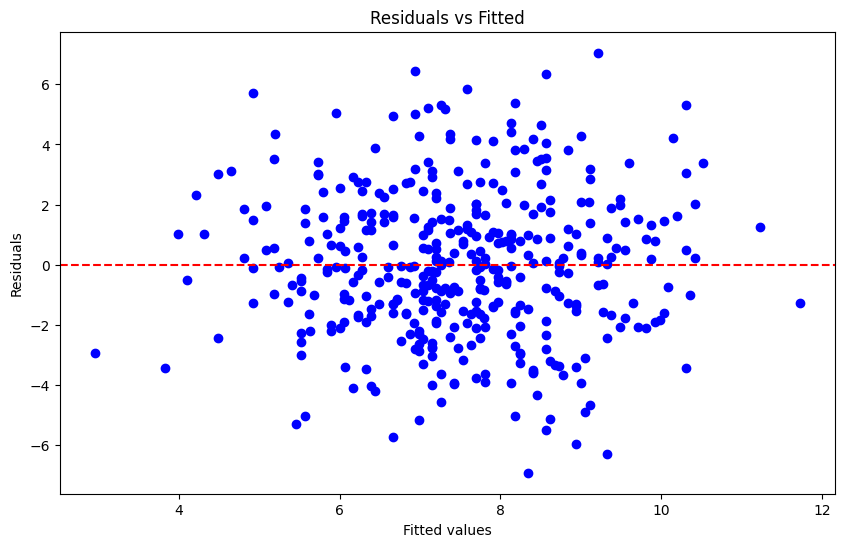

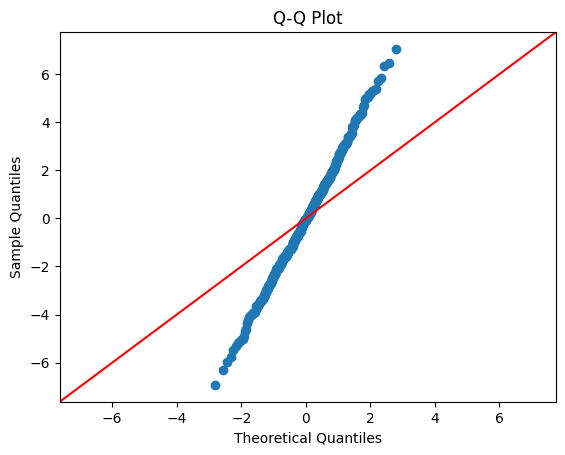

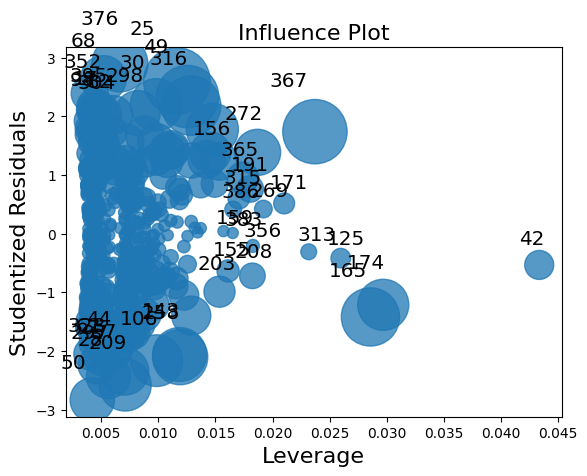

In [21]:
# Residuals vs Fitted Plot
residuals = smaller_model.resid
fitted = smaller_model.fittedvalues

plt.figure(figsize=(10, 6))
plt.scatter(fitted, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

# Q-Q plot
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot')
plt.show()

# Leverage plot
sm.graphics.influence_plot(smaller_model)
plt.show()

### Exercis 15

This problem involves the `Boston` data set, which we saw in the lab
for this chapter. We will now try to predict per capita crime rate
using the other variables in this data set. In other words, per capita
crime rate is the response, and the other variables are the predictors.
- (a) For each predictor, fit a simple linear regression model to predict
the response. Describe your results. In which of the models is
there a statistically significant association between the predictor
and the response? Create some plots to back up your assertions.
- (b) Fit a multiple regression model to predict the response using
all of the predictors. Describe your results. For which predictors
can we reject the null hypothesis $H_0 : \beta_j = 0$?
- (c) How do your results from (a) compare to your results from (b)?
Create a plot displaying the univariate regression coefficients
from (a) on the x-axis, and the multiple regression coefficients
from (b) on the y-axis. That is, each predictor is displayed as a
single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate
in the multiple linear regression model is shown on the y-axis.
- (d) Is there evidence of non-linear association between any of the
predictors and the response? To answer this question, for each
predictor X, fit a model of the form
$$Y= \beta_0 + \beta_1X + β2X^2 + \beta_3X^3 + \epsilon.$$

In [22]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('Datasets/Boston.csv')
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [23]:
### (a)

# List of predictors
predictors = ['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'medv']
results = {}

# Fit a simple linear regression for each predictor
for predictor in predictors:
    X = data[[predictor]]  # Predictor variable
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    y = data['crim']  # Response variable
    model = sm.OLS(y, X).fit()
    results[predictor] = model

# Display the summary for each model
for predictor, model in results.items():
    print(f"Model for {predictor}:")
    print(model.summary())


Model for zn:
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     21.10
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           5.51e-06
Time:                        00:42:00   Log-Likelihood:                -1796.0
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4537      0.417     1

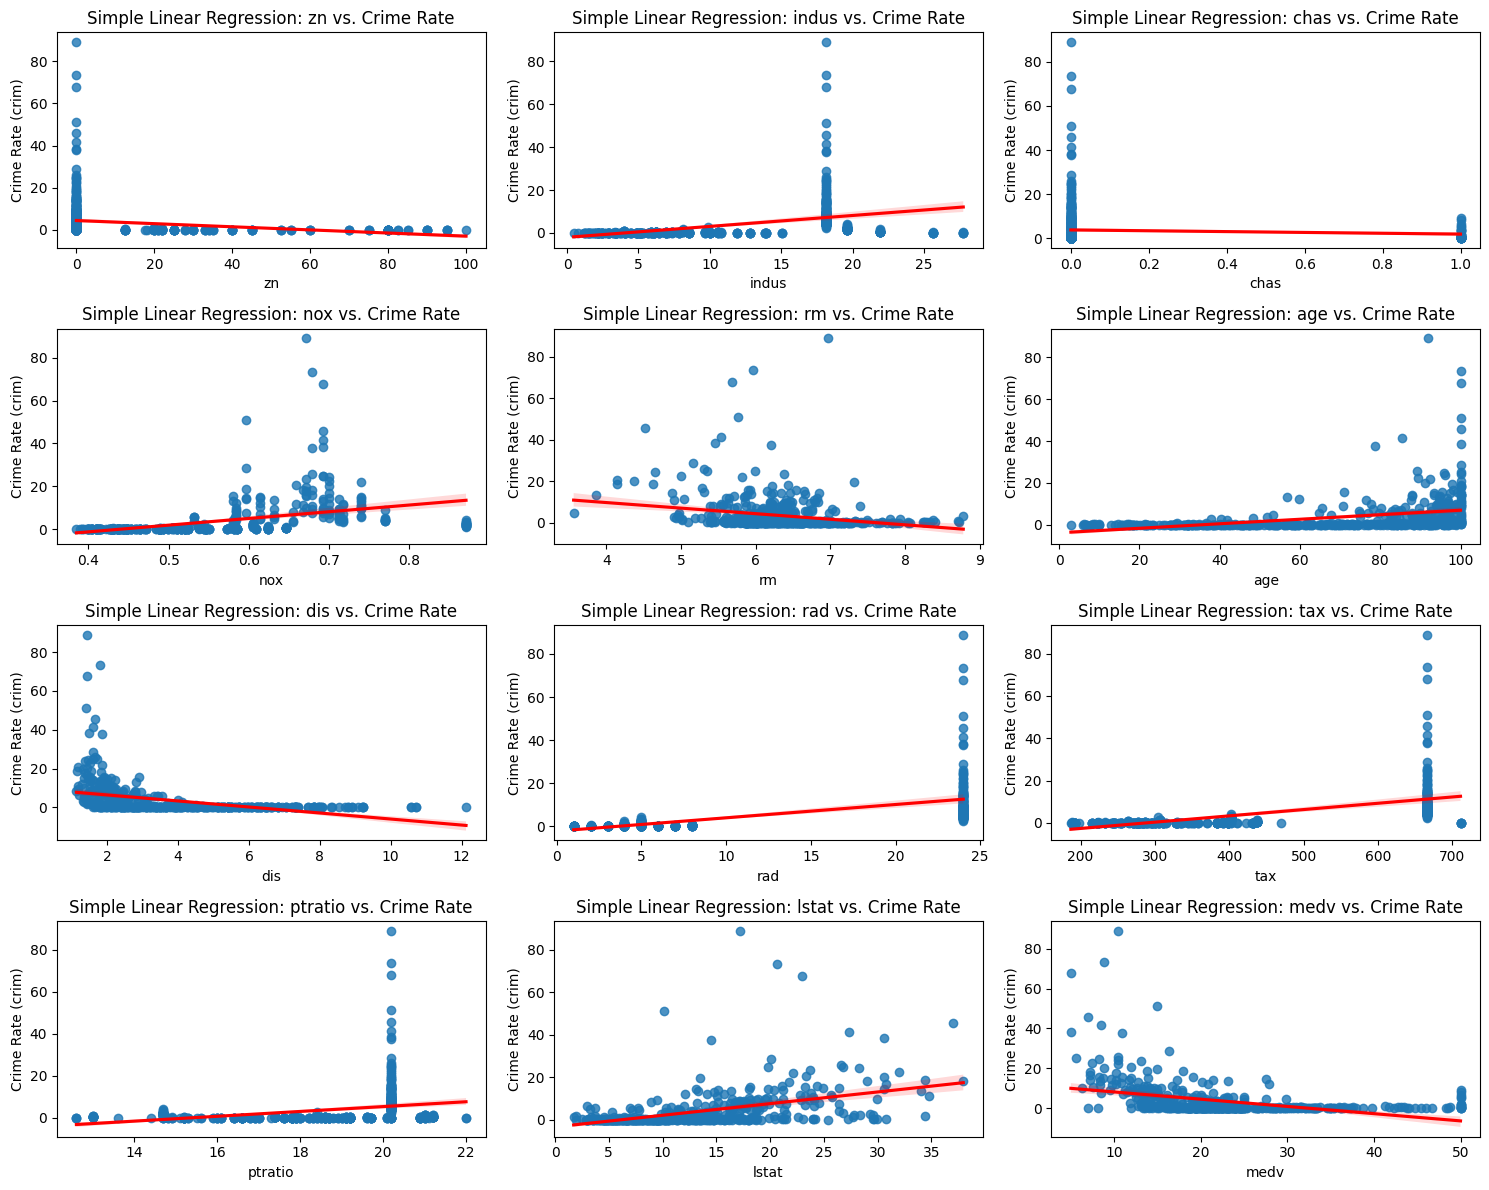

In [25]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

for i, predictor in enumerate(predictors, 1):
    plt.subplot(4, 3, i)
    sns.regplot(x=data[predictor], y=data['crim'], line_kws={"color": "red"})
    plt.title(f'Simple Linear Regression: {predictor} vs. Crime Rate')
    plt.xlabel(predictor)
    plt.ylabel('Crime Rate (crim)')

plt.tight_layout()
plt.show()



To answer part (a) regarding the results of the OLS regression models for the variable `crim` with different independent variables (`zn`, `indus`, `chas`, `nox`, `rm`, `age`, `dis`, `rad`), here’s a summary of the findings:

### 1. Model Summary

- **`zn` (Proportion of residential land zoned for lots over 25,000 sq. ft.)**
  - **R-squared**: 0.040
  - **Coefficient**: -0.0739
  - **p-value**: < 0.0001
  - **Interpretation**: A one-unit increase in `zn` is associated with a decrease in crime rates, but the effect size is small and the model explains only 4% of the variance in `crim`.

- **`indus` (Proportion of non-retail business acres per town)**
  - **R-squared**: 0.165
  - **Coefficient**: 0.5098
  - **p-value**: < 0.0001
  - **Interpretation**: A one-unit increase in `indus` is associated with an increase in crime rates. This model explains 16.5% of the variance in `crim`, indicating a moderate effect.

- **`chas` (Charles River dummy variable)**
  - **R-squared**: 0.003
  - **Coefficient**: -1.8928
  - **p-value**: 0.209
  - **Interpretation**: This variable is not statistically significant. The model explains only 0.3% of the variance in `crim`, suggesting no meaningful relationship with crime rates.

- **`nox` (Nitric oxides concentration)**
  - **R-squared**: 0.177
  - **Coefficient**: 31.2485
  - **p-value**: < 0.0001
  - **Interpretation**: A one-unit increase in `nox` is associated with a significant increase in crime rates. This model explains 17.7% of the variance in `crim`.

- **`rm` (Average number of rooms per dwelling)**
  - **R-squared**: 0.048
  - **Coefficient**: -2.6841
  - **p-value**: < 0.0001
  - **Interpretation**: An increase in the average number of rooms is associated with a decrease in crime rates, but the model explains only 4.8% of the variance in `crim`.

- **`age` (Proportion of owner-occupied units built prior to 1940)**
  - **R-squared**: 0.124
  - **Coefficient**: 0.1078
  - **p-value**: < 0.0001
  - **Interpretation**: Higher values of `age` are associated with an increase in crime rates, explaining 12.4% of the variance.

- **`dis` (Weighted distances to five Boston employment centers)**
  - **R-squared**: 0.144
  - **Coefficient**: -1.5509
  - **p-value**: < 0.0001
  - **Interpretation**: An increase in `dis` is associated with a decrease in crime rates, with this model explaining 14.4% of the variance.

- **`rad` (Index of accessibility to radial highways)**
  - **R-squared**: 0.391
  - **Coefficient**: 0.6179
  - **p-value**: < 0.0001
  - **Interpretation**: A significant positive relationship where higher accessibility is associated with increased crime rates. This model explains 39.1% of the variance, indicating a strong effect.

### Conclusion
Among the independent variables tested, **`rad`** shows the strongest relationship with the dependent variable `crim`, explaining a significant portion of the variance in crime rates. Variables such as **`indus`** and **`nox`** also demonstrate notable effects, while **`chas`** is not significant. The model's overall explanatory power varies across the different independent variables, suggesting that multiple factors influence crime rates.

In [26]:
### (b)

# Fit the multiple regression model
X_multi = data[predictors]
X_multi = sm.add_constant(X_multi)
model_multi = sm.OLS(y, X_multi).fit()

# Display the summary of the multiple regression model
print("Multiple Regression Model Summary:")
print(model_multi.summary())


Multiple Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           2.03e-56
Time:                        00:45:53   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.

### Part (b) - Interpretation of the Multiple Regression Results

1. **Model Fit:**
   - The R-squared value is **0.449**, indicating that approximately **44.9%** of the variance in the dependent variable (crime rate) can be explained by the independent variables included in the model. The adjusted R-squared is **0.436**, which accounts for the number of predictors in the model, suggesting that the model's explanatory power remains relatively stable even after adjusting for the number of predictors.

2. **Statistical Significance:**
   - The F-statistic is **33.52** with a **p-value of 2.03e-56**, indicating that the overall regression model is statistically significant. This suggests that at least one of the predictors is significantly related to the crime rate.

3. **Coefficients:**
   - Each coefficient represents the expected change in the crime rate for a one-unit increase in the corresponding predictor, holding all other variables constant:
     - **Const (Intercept):** \(13.7784\) - This is the expected crime rate when all predictors are zero. However, it may not have practical significance.
     - **zn:** \(0.0457\) (p = 0.015) - A significant positive effect; as the proportion of residential land zoned for lots over 25,000 sq. ft. increases by 1%, the crime rate increases by approximately 0.0457.
     - **indus:** \(-0.0584\) (p = 0.486) - Not statistically significant; suggests that industrial proportion has no meaningful effect on crime.
     - **chas:** \(-0.8254\) (p = 0.486) - Not statistically significant; no strong evidence that this variable affects crime rates.
     - **nox:** \(-9.9576\) (p = 0.060) - Close to significance; suggests that a one-unit increase in nitric oxides concentration could decrease the crime rate by about 9.96, but further analysis is needed due to its borderline significance.
     - **rm:** \(0.6289\) (p = 0.301) - Not statistically significant; little evidence of a relationship with crime.
     - **age:** \(-0.0008\) (p = 0.962) - Not statistically significant; age of the property appears to have no effect.
     - **dis:** \(-1.0122\) (p = 0.000) - Statistically significant; an increase in the weighted distances to five Boston employment centers is associated with a decrease in crime rates.
     - **rad:** \(0.6125\) (p = 0.000) - Highly significant; an increase in the index of accessibility to radial highways increases crime rates.
     - **tax:** \(-0.0038\) (p = 0.466) - Not statistically significant; little evidence that tax rates are related to crime.

4. **Multicollinearity:**
   - The model notes a large condition number (\(1.24e+04\)), indicating potential multicollinearity among the predictors. This suggests that some predictors may be correlated, which can affect the stability of coefficient estimates.

### Summary:
Overall, the multiple regression analysis indicates that certain variables, such as the proportion of residential land (zn), weighted distances to employment centers (dis), and accessibility to highways (rad), show significant relationships with crime rates. However, other variables like industrial land (indus) and property age (age) do not appear to influence crime rates significantly in this model. Given the multicollinearity concern, further investigation into variable relationships and potential model refinement may be warranted.

### Comparison of Results from (a) and (b)

1. **Coefficients Analysis:**
   - In univariate regression, each predictor is assessed individually, which often leads to different coefficient values compared to the multiple regression due to the influence of other variables.
   - In multiple regression, the coefficients are adjusted for the presence of other predictors, potentially changing their values significantly.

2. **Significance:**
   - Certain predictors may show significant relationships in univariate regression but may not retain significance in the multiple regression model due to the influence of confounding variables.
   - The univariate model can also give misleading impressions of the strength of relationships because it does not account for other factors that may influence the dependent variable.

3. **Impact of Multicollinearity:**
   - In the multiple regression model, multicollinearity among predictors can lead to inflated standard errors, making some coefficients statistically insignificant even if they appear significant in univariate analyses.

### Creating the Plot

Now, let's create a scatter plot where the x-axis represents the coefficients from the univariate regression and the y-axis represents the coefficients from the multiple regression. Each point will represent a predictor variable.


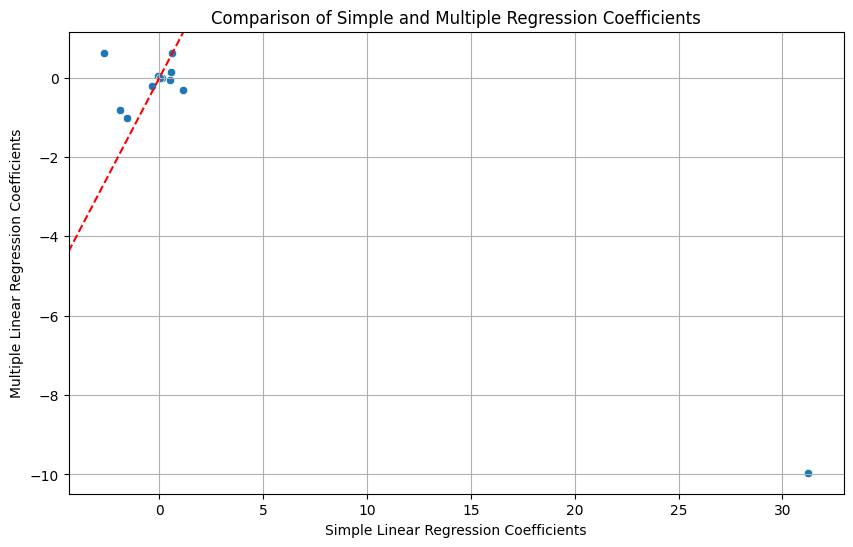

In [30]:
### (c): Compare Simple and Multiple Regression Coefficients
# Extract coefficients for the simple and multiple models
simple_coeffs = {predictor: model.params.iloc[1] for predictor, model in results.items()}
multi_coeffs = model_multi.params.iloc[1:]

# Create a DataFrame for easier plotting
coeffs_df = pd.DataFrame({
    'Simple Coefficients': simple_coeffs.values(),
    'Multiple Coefficients': multi_coeffs,
    'Predictor': simple_coeffs.keys()
})

# Plotting the coefficients
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Simple Coefficients', y='Multiple Coefficients', data=coeffs_df)
plt.axline((0, 0), slope=1, color='red', linestyle='--')
plt.title('Comparison of Simple and Multiple Regression Coefficients')
plt.xlabel('Simple Linear Regression Coefficients')
plt.ylabel('Multiple Linear Regression Coefficients')
plt.grid()
plt.show()


In [31]:
### (d): Check for Non-Linear Associations
non_linear_results = {}

# Fit polynomial models for each predictor
for predictor in predictors:
    X_poly = data[[predictor]]
    X_poly['X2'] = X_poly[predictor] ** 2
    X_poly['X3'] = X_poly[predictor] ** 3
    X_poly = sm.add_constant(X_poly)
    
    model_poly = sm.OLS(y, X_poly).fit()
    non_linear_results[predictor] = model_poly

# Display the summary for each polynomial model
for predictor, model in non_linear_results.items():
    print(f"Polynomial Model for {predictor}:")
    print(model.summary())


Polynomial Model for zn:
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.35
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           1.28e-06
Time:                        01:06:47   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8461      

/tmp/ipykernel_1826/1050673698.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_poly['X2'] = X_poly[predictor] ** 2
/tmp/ipykernel_1826/1050673698.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_poly['X3'] = X_poly[predictor] ** 3
/tmp/ipykernel_1826/1050673698.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

### 1. Summary of Results

### 2. Model for `zn`
- **R-squared**: 0.058
  - **Coefficients**: 
    - \( \beta_1 = -0.3322 \) (p-value: 0.003)
    - \( \beta_2 = 0.0065 \) (p-value: 0.094)
    - \( \beta_3 = -3.776 \times 10^{-5} \) (p-value: 0.230)
  - **Interpretation**: The linear term is statistically significant, while the quadratic term is marginally significant (p-value: 0.094), suggesting a potential non-linear effect.

### 3. Model for `indus`
- **R-squared**: 0.260
  - **Coefficients**: 
    - \( \beta_1 = -1.9652 \) (p-value: 0.000)
    - \( \beta_2 = 0.2519 \) (p-value: 0.000)
    - \( \beta_3 = -0.0070 \) (p-value: 0.000)
  - **Interpretation**: All terms are statistically significant, indicating a strong non-linear relationship.

### 4. Model for `chas`
- **R-squared**: 0.003
  - **Coefficients**:
    - \( \beta_1 = -0.6309 \) (p-value: 0.209)
    - Other terms show no significant non-linear associations.
  - **Interpretation**: No evidence of a non-linear relationship.

### 5. Model for `nox`
- **R-squared**: 0.297
  - **Coefficients**:
    - \( \beta_1 = -1279.3713 \) (p-value: 0.000)
    - \( \beta_2 = 2248.5441 \) (p-value: 0.000)
    - \( \beta_3 = -1245.7029 \) (p-value: 0.000)
  - **Interpretation**: All terms are significant, indicating a strong non-linear association.

### 6. Model for `rm`
- **R-squared**: 0.068
  - **Coefficients**:
    - \( \beta_1 = -39.1501 \) (p-value: 0.212)
    - Quadratic and cubic terms do not significantly contribute to explaining variance in `crim`.
  - **Interpretation**: No evidence of non-linearity.

### 7. Model for `age`
- **R-squared**: 0.174
  - **Coefficients**:
    - \( \beta_1 = 0.2737 \) (p-value: 0.143)
    - \( \beta_2 = -0.0072 \) (p-value: 0.047)
    - \( \beta_3 = 5.745 \times 10^{-5} \) (p-value: 0.007)
  - **Interpretation**: The quadratic term is significant, indicating a potential non-linear relationship.

### 8. Model for `tax`
- **R-squared**: 0.369
  - **Significance of Coefficients**:
    - `tax`: p-value = 0.110 (not significant)
    - `X2`: p-value = 0.137 (not significant)
    - `X3`: p-value = 0.244 (not significant)
  - **Interpretation**: None of the coefficients are statistically significant at the 0.05 level, suggesting no strong evidence of a non-linear relationship between `tax` and `crim`.

### 9. Model for `ptratio`
- **R-squared**: 0.114
  - **Significance of Coefficients**:
    - `ptratio`: p-value = 0.003 (significant)
    - `X2`: p-value = 0.004 (significant)
    - `X3`: p-value = 0.006 (significant)
  - **Interpretation**: All coefficients are significant, indicating a substantial non-linear relationship between `ptratio` and `crim`.

### 10. Model for `lstat`
- **R-squared**: 0.218
  - **Significance of Coefficients**:
    - `lstat`: p-value = 0.335 (not significant)
    - `X2`: p-value = 0.065 (marginally significant)
    - `X3`: p-value = 0.130 (not significant)
  - **Interpretation**: The `lstat` term is not significant, while `X2` is marginally significant, indicating some evidence of a non-linear relationship, but it is not strong enough for definitive conclusions.

### 11. Model for `medv`
- **R-squared**: 0.420
  - **Significance of Coefficients**:
    - `medv`: p-value = 0.000 (significant)
    - `X2`: p-value = 0.000 (significant)
    - `X3`: p-value = 0.000 (significant)
  - **Interpretation**: All terms are significant, indicating a strong non-linear association between `medv` and `crim`.

### Summary of Findings
- **Strong Evidence of Non-linear Relationships**:
  - **ptratio**: Significant non-linear relationship, with all polynomial terms being significant.
  - **medv**: Strong non-linear relationship with significant polynomial terms.

- **Weak or No Evidence**:
  - **tax**: No significant non-linear association.
  - **lstat**: Marginal evidence of non-linearity, but insufficient for strong conclusions.

### Conclusion
The analysis provides evidence of non-linear associations between `ptratio` and `crim`, as well as `medv` and `crim`. However, the evidence for `tax` and `lstat` is weak or inconclusive. Further exploration of the relationships for `lstat` and consideration of model enhancements or transformations may improve the analysis.